# Lyrics prediction

In this notebook, we made attempts to predict the genre of metal songs based on their lyrics. Since the lyrics of a song appears to have a relatively higher correlation with whether it belongs to black metal, we focuses mostly on the binary classification of whether a song is black metal.

Multiple models have been examined, and multinomial naive bayes appears to be the best option. We tuned the model and measured its performance.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bands = pd.read_csv('data/ma_bands_data.csv', index_col=0)
bands['theme'] = bands['theme'].fillna('')

songs = pd.read_csv('data/ma_songs_lyrics.csv', index_col=0)
songs = songs[  (songs['lyrics'] != '(lyrics not available)')
              & (songs['lyrics'] != '(Instrumental)')
              & ~songs['lyrics'].str.contains('[^\x00-\x7f]')]
songs = pd.merge(bands, songs, left_on='name', right_on='band_name')

In [2]:
songs

name                                                url  \
0       $ilverdollar  https://www.metal-archives.com/bands/%24ilverd...   
1       $ilverdollar  https://www.metal-archives.com/bands/%24ilverd...   
2       $ilverdollar  https://www.metal-archives.com/bands/%24ilverd...   
3       $ilverdollar  https://www.metal-archives.com/bands/%24ilverd...   
4       $ilverdollar  https://www.metal-archives.com/bands/%24ilverd...   
...              ...                                                ...   
799759            폐허  https://www.metal-archives.com/bands/%ED%8F%90...   
799760            폐허  https://www.metal-archives.com/bands/%ED%8F%90...   
799761            폐허  https://www.metal-archives.com/bands/%ED%8F%90...   
799762            폐허  https://www.metal-archives.com/bands/%ED%8F%90...   
799763            폐허  https://www.metal-archives.com/bands/%ED%8F%90...   

                                       genre  \
0                          Heavy/Power Metal   
1                          Heavy/Power Metal   
2                          Heavy/Power Metal   
3                          Heavy/Power Metal   
4                          Heavy/Power Metal   
...                                      ...   
799759  Dark Ambient/Atmospheric Black Metal   
799760  Dark Ambient/Atmospheric Black Metal   
799761  Dark Ambient/Atmospheric Black Metal   
799762  Dark Ambient/Atmospheric Black Metal   
799763  Dark Ambient/Atmospheric Black Metal   

                                                    theme label       country  \
0                 ['Occult', ' Fantasy', ' Human issues']   NaN        Sweden   
1                 ['Occult', ' Fantasy', ' Human issues']   NaN        Sweden   
2                 ['Occult', ' Fantasy', ' Human issues']   NaN        Sweden   
3                 ['Occult', ' Fantasy', ' Human issues']   NaN        Sweden   
4                 ['Occult', ' Fantasy', ' Human issues']   NaN        Sweden   
...                                                   ...   ...           ...   
799759  ['Nature', ' Anti-war', ' Sorrow', ' Depression']   NaN  Korea, South   
799760  ['Nature', ' Anti-war', ' Sorrow', ' Depression']   NaN  Korea, South   
799761  ['Nature', ' Anti-war', ' Sorrow', ' Depression']   NaN  Korea, South   
799762  ['Nature', ' Anti-war', ' Sorrow', ' Depression']   NaN  Korea, South   
799763  ['Nature', ' Anti-war', ' Sorrow', ' Depression']   NaN  Korea, South   

                      location   status    date         years  \
0       Nyköping, Södermanland   Active  1996.0  1996-present   
1       Nyköping, Södermanland   Active  1996.0  1996-present   
2       Nyköping, Södermanland   Active  1996.0  1996-present   
3       Nyköping, Södermanland   Active  1996.0  1996-present   
4       Nyköping, Södermanland   Active  1996.0  1996-present   
...                        ...      ...     ...           ...   
799759                     NaN  On hold  2001.0     2001-2015   
799760                     NaN  On hold  2001.0     2001-2015   
799761                     NaN  On hold  2001.0     2001-2015   
799762                     NaN  On hold  2001.0     2001-2015   
799763                     NaN  On hold  2001.0     2001-2015   

                                                album_url     band_name  \
0       https://www.metal-archives.com/bands/%24ilverd...  $ilverdollar   
1       https://www.metal-archives.com/bands/%24ilverd...  $ilverdollar   
2       https://www.metal-archives.com/bands/%24ilverd...  $ilverdollar   
3       https://www.metal-archives.com/bands/%24ilverd...  $ilverdollar   
4       https://www.metal-archives.com/bands/%24ilverd...  $ilverdollar   
...                                                   ...           ...   
799759  https://www.metal-archives.com/bands/%ED%8F%90...            폐허   
799760  https://www.metal-archives.com/bands/%ED%8F%90...            폐허   
799761  https://www.metal-archives.com/bands/%ED%8F%90...            폐허   
799762  https://www.metal-archives

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, token_pattern="middle eastern|[0-9a-z'\-]+", min_df=1000,
                             stop_words=['metal', 'rock', "'n'", 'roll', 'early', 'mid', 'later',
                                         'and', 'elements', 'influences', 'various', 'with'])
genre_mat = vectorizer.fit_transform(songs['genre'])
genre_names = vectorizer.get_feature_names_out()
print(genre_names)

['alternative' 'ambient' 'atmospheric' 'avant-garde' 'black' 'blackened'
 'brutal' 'crossover' 'crust' 'dark' 'death' 'deathcore' 'depressive'
 'doom' 'drone' 'electronic' 'epic' 'experimental' 'extreme' 'folk'
 'funeral' 'goregrind' 'gothic' 'grindcore' 'groove' 'hard' 'hardcore'
 'heavy' 'industrial' 'melodic' 'metalcore' 'neoclassical' 'noise'
 'nu-metal' 'nwobhm' 'pagan' 'post-black' 'post-metal' 'power'
 'progressive' 'psychedelic' 'punk' 'raw' 'slam' 'sludge' 'southern'
 'speed' 'stoner' 'symphonic' 'technical' 'thrash' 'viking']


Firstly, I extract the top 15 most occuring genre names. It is assumed that all songs by one band would be under the same genre.

In [4]:
genre_sum = genre_mat.sum(axis=0)
top_genres = np.argsort(genre_sum)[0, -1 : -16 : -1]
print(top_genres[0])
print(genre_names[top_genres])
print((genre_sum[0, top_genres] / songs.shape[0]))

[[10 50  4 27 38 29 13 39 23 46 22 24  6 48 25]]
[['death' 'thrash' 'black' 'heavy' 'power' 'melodic' 'doom' 'progressive'
  'grindcore' 'speed' 'gothic' 'groove' 'brutal' 'symphonic' 'hard']]
[[0.3566102  0.23623219 0.21140862 0.17797375 0.09440785 0.09241351
  0.07428691 0.07104221 0.03624569 0.03446142 0.03313352 0.03107417
  0.03009638 0.02739058 0.02723428]]


Since one song could have multiple genre labels, I will consider whether a song belongs to each genre or not (binary classification with respect to each genre).

As the data is highly imbalanced when considering the fraction of songs belonging to any individual genre, an undersampling is done to the songs not belonging to that genre.

In [5]:
from sklearn.model_selection import train_test_split

def balance(X, y):
    not_belong_pos = np.flatnonzero(~y)
    belong_pos = np.flatnonzero(y)
    np.random.seed(0)
    not_belong_pos = np.random.choice(not_belong_pos, belong_pos.shape[0], replace=False)
    sample_pos = np.concatenate((not_belong_pos, belong_pos))

    X = X[sample_pos]
    y = np.concatenate((np.zeros(not_belong_pos.shape[0], dtype=y.dtype),
                              np.ones(belong_pos.shape[0], dtype=y.dtype)))
    return X, y

def get_train_test(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y.toarray().ravel(),
                                                        test_size=test_size,
                                                        random_state=0)
    
    X_train, y_train = balance(X_train, y_train)

    # print('Sample size:', not_belong_pos.shape[0], '+', belong_pos.shape[0])

    return X_train, X_test, y_train, y_test

I score the performance of using multinomial naive bayes on each genre. Measuring the performance with the scoring function provided by the model is not good, as it simply calculates the fraction of the correctly classified data, which does not represent the performance on unbalanced data well. Instead, I prefer to use Matthews correlation coefficient, which is a better metric for the performance using unbalanced data.

It appears that lyrics of metal songs doesn't seem to have much correlation with its genre in general. Still, whether a songs belongs to the genre of black metal appears to have a relatively higher correlation with its lyrics. We would focus on classifying whether a song belongs to black metal below.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

for genre_pos in np.asarray(top_genres).ravel():
    sample = songs['lyrics'].sample(50000, random_state=0)

    vectorizer = TfidfVectorizer(smooth_idf=False)
    lyrics_mat = vectorizer.fit_transform(sample)

    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

    mnb = MultinomialNB()
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    print(f'{genre_pos: <10}{genre_names[genre_pos]: <15} \
            {mnb.score(X_test, y_test): <10}{matthews_corrcoef(y_test, y_pred)}')

10        death                       0.6434    0.22921397685971787
50        thrash                      0.5846    0.17614512505763152
4         black                       0.6904    0.263273347851043
27        heavy                       0.5934    0.22559856498184652
38        power                       0.4336    0.17277021486910057
29        melodic                     0.334     0.09435779966580214
13        doom                        0.6616    0.12542070972736918
39        progressive                 0.4152    0.10816995302292835
23        grindcore                   0.916     0.12320179828168006
46        speed                       0.478     0.05708435093769165
22        gothic                      0.4418    0.08284631053329308
24        groove                      0.4422    0.056536014494460544
6         brutal                      0.859     0.14931246769010667
48        symphonic                   0.2648    0.07208807263595413
25        hard                        0.5664    0

# Tuning the vectorizer

This is to find the best range of ngrams to extract from the lyrics.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

genre_pos = 4

for ngram_low in range(1, 4):
    for ngram_high in range(ngram_low, 4):
        sample = songs['lyrics'].sample(50000, random_state=0)

        vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(ngram_low, ngram_high))
        lyrics_mat = vectorizer.fit_transform(sample)

        X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

        mnb = MultinomialNB()
        y_pred = mnb.fit(X_train, y_train).predict(X_test)
        print(f'({ngram_low}, {ngram_high}) {matthews_corrcoef(y_test, y_pred)}')

(1, 1) 0.263273347851043
(1, 2) 0.2645782834383658
(1, 3) 0.25942785053348855
(2, 2) 0.25789206815809673
(2, 3) 0.24404512729042427
(3, 3) 0.21001963732123796


We also investigated the impact of the use of stop words (words that are considered to have little meaning in general in English) on model performance. Interestingly, it appears that by including these stop words, we actually achieved a better model performance.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

genre_pos = 4

for stop_words in (None, 'english'):
    sample = songs['lyrics'].sample(50000, random_state=0)

    vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), stop_words=stop_words)
    lyrics_mat = vectorizer.fit_transform(sample)

    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

    mnb = MultinomialNB()
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    print(f'{str(stop_words):<10}{matthews_corrcoef(y_test, y_pred)}')

None      0.2645782834383658
english   0.26026754714172456


This is to find the best threshold of ignoring the words that apear frequently accross multiple songs.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

genre_pos = 4

for max_df_10 in range(1, 11, 1):
    sample = songs['lyrics'].sample(50000, random_state=0)

    vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=max_df_10 / 10)
    lyrics_mat = vectorizer.fit_transform(sample)

    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

    mnb = MultinomialNB()
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    print(f'{max_df_10 / 10} {matthews_corrcoef(y_test, y_pred)}')

0.1 0.25661580602885586
0.2 0.2604124911654709
0.3 0.2617017580056059
0.4 0.26248966945679525
0.5 0.26641037379759397
0.6 0.26747143202935614
0.7 0.26747143202935614
0.8 0.2672106574932251
0.9 0.2656310276743899
1.0 0.2645782834383658


# Comparison of classifiers

We conclude that multinomial naive bayes is most suitable for our task after comparing multiple classifers. While logistic regression and support vector machine has a similar performance, they are relatively slow to train, and it would be hard to apply them on this large dataset.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

genre_pos = 4

sample = songs['lyrics'].sample(10000, random_state=0)

vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=0.6)
lyrics_mat = vectorizer.fit_transform(sample)
lyrics_words = vectorizer.get_feature_names_out()
print(lyrics_mat.shape)

X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

(10000, 489038)


## 1. Multinomial naive bayes

CPU times: user 32.6 ms, sys: 27 µs, total: 32.6 ms
Wall time: 31.7 ms
0.28224282802325096


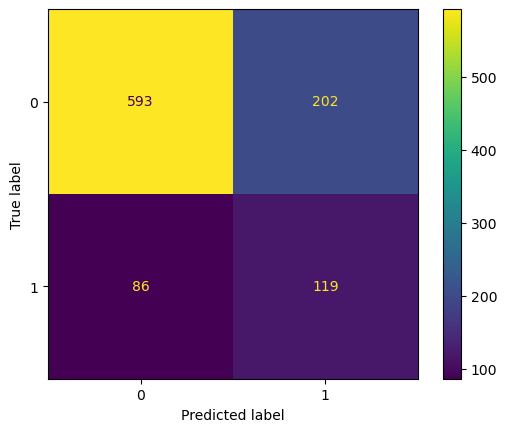

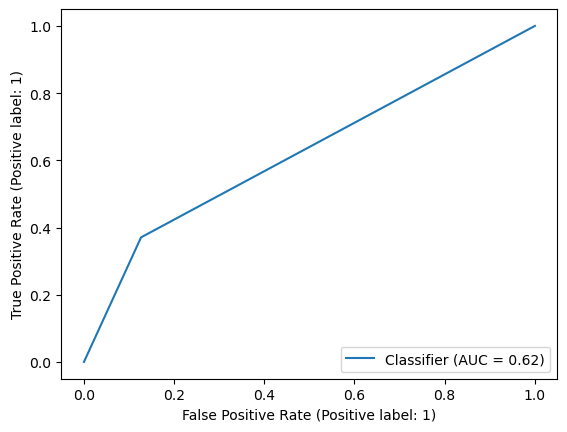

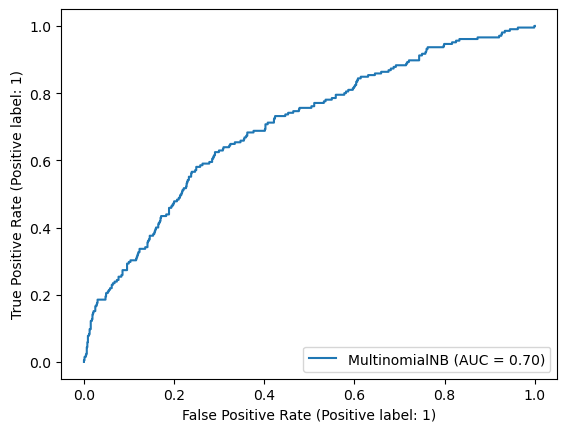

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

mnb = MultinomialNB()
%time y_pred = mnb.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_predictions(y_pred, y_test)
RocCurveDisplay.from_estimator(mnb, X_test, y_test);

## 2. Other classifiers

CPU times: user 11.2 s, sys: 14.9 s, total: 26.1 s
Wall time: 3.06 s
0.25285925226313144


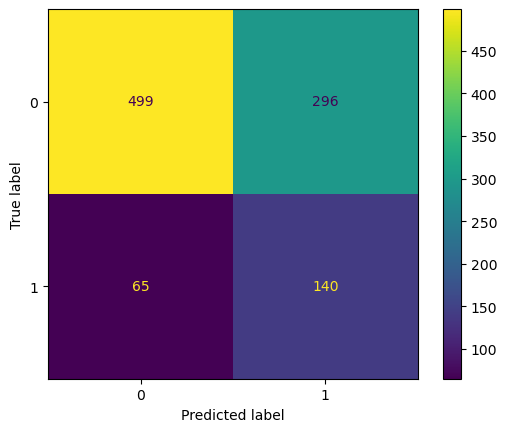

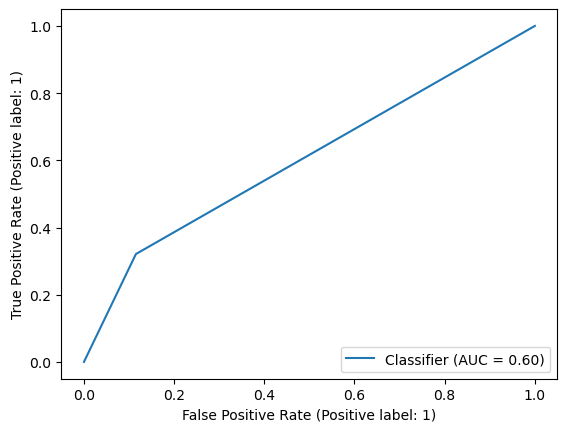

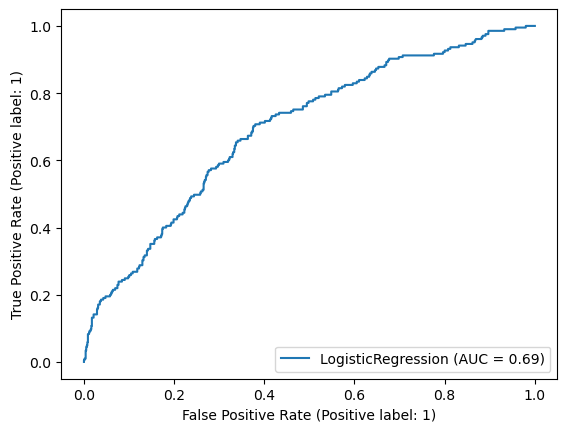

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

lr = LogisticRegression()
%time y_pred = lr.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_predictions(y_pred, y_test)
RocCurveDisplay.from_estimator(lr, X_test, y_test);

CPU times: user 18.9 s, sys: 54.8 ms, total: 19 s
Wall time: 19 s
0.2209308549463086


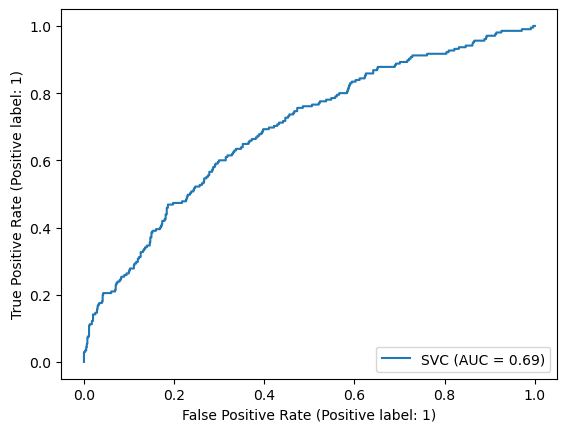

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

svc = SVC()
%time y_pred = svc.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

RocCurveDisplay.from_estimator(svc, X_test, y_test);

CPU times: user 18.1 s, sys: 50.6 ms, total: 18.1 s
Wall time: 18.1 s
0.05261321595709858


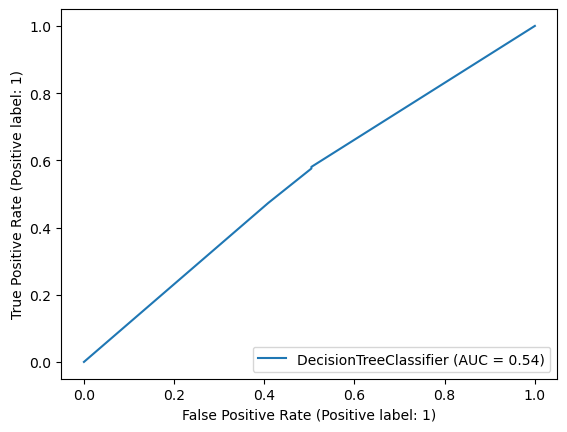

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

dtc = DecisionTreeClassifier()
%time y_pred = dtc.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

RocCurveDisplay.from_estimator(dtc, X_test, y_test);

CPU times: user 205 ms, sys: 3.76 ms, total: 209 ms
Wall time: 208 ms
0.20495443901458307


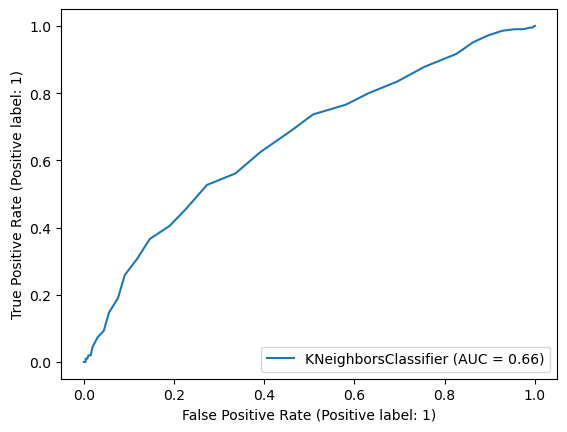

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

neigh = KNeighborsClassifier(n_neighbors=60)
%time y_pred = neigh.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

RocCurveDisplay.from_estimator(neigh, X_test, y_test);

# Feature selection

We now select the words that are the most predictive of whether a song is black metal. The first method is to get the top $ n $ words with highest probability (the nature of this probability is hard to explain as its not actually the word's frequency, but its tf-idf) from each category in the naive bayes classifier. The second method is to use the most important features in gradient boosted tree for classification as mentioned in the paper [Scaling up the Naive Bayesian Classifier: Using Decision Trees for Feature Selection](http://alumni.cs.ucr.edu/~ratana/DCAP02.pdf). We did not use the simple decision tree as it performs poorly on this dataset and opt for gradient boosted tree instead.

We found that the performance of the first method is better, and used it in the final model.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

genre_pos = 4

sample = songs['lyrics'].sample(200000, random_state=0)

vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=0.6)
lyrics_mat = vectorizer.fit_transform(sample)
lyrics_words = vectorizer.get_feature_names_out()
print(lyrics_mat.shape)

X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

(200000, 3635744)


## 1. Select features with high probability of occuring in different classes in naive bayes classification

It should be noted that I selected n_features from both category before finding the union of these features.

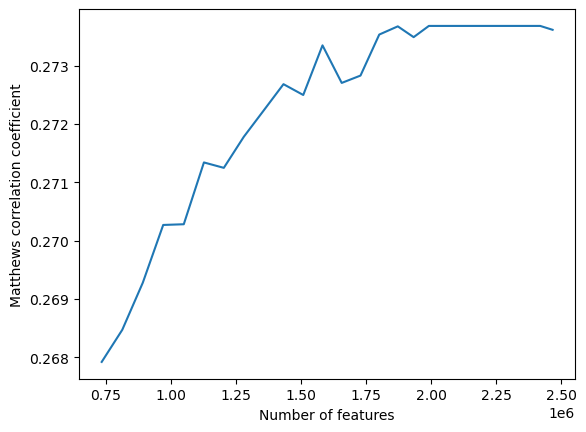

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

mnb_full = MultinomialNB()
y_pred = mnb_full.fit(X_train, y_train).predict(X_test)

def n_features_mnb_benchmark(x):
    x1 = list()
    y = list()
    
    for n_features in x:
#         print(n_features, end='\r')
        important_pos = np.union1d(mnb_full.feature_log_prob_[0].argsort()[-1 : -n_features - 1 : -1],
                                   mnb_full.feature_log_prob_[1].argsort()[-1 : -n_features - 1 : -1])
        mnb = MultinomialNB()
        y_pred = mnb.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos])
        x1.append(important_pos.shape[0])
        y.append(matthews_corrcoef(y_test, y_pred))
        
    plt.xlabel('Number of features')
    plt.ylabel('Matthews correlation coefficient')
    plt.plot(x1, y);

n_features_mnb_benchmark(range(500000, 2000000, 50000))

## 2. Select features with high importance in gradient boosted trees

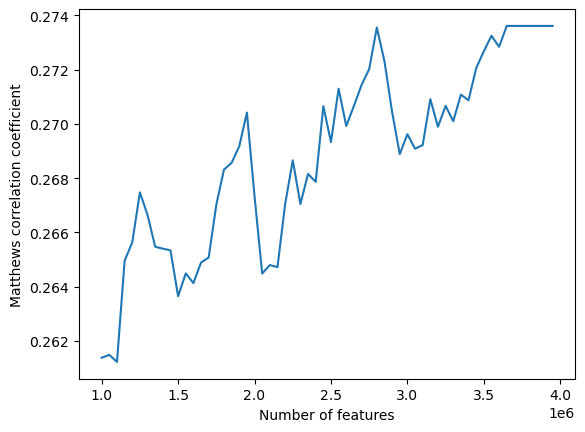

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import xgboost as xgb

clf = xgb.XGBClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)

def n_features_gb_benchmark(x):
    y = list()

    for n_features in x:
#         print(n_features, end='\r')
        important_pos = clf.feature_importances_.argsort()[-1 : -n_features - 1 : -1]
        mnb = MultinomialNB()
        y_pred = mnb.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos])
        y.append(matthews_corrcoef(y_test, y_pred))
        
    plt.xlabel('Number of features')
    plt.ylabel('Matthews correlation coefficient')
    plt.plot(x, y);

n_features_gb_benchmark(range(1000000, 4000000, 50000))

# Final model for black metal binary classification

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

genre_pos = 4

sample = songs['lyrics']

vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=0.6)
lyrics_mat = vectorizer.fit_transform(sample)
lyrics_words = vectorizer.get_feature_names_out()
print(lyrics_mat.shape)

X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

(799764, 7790187)


0.30654165059108934


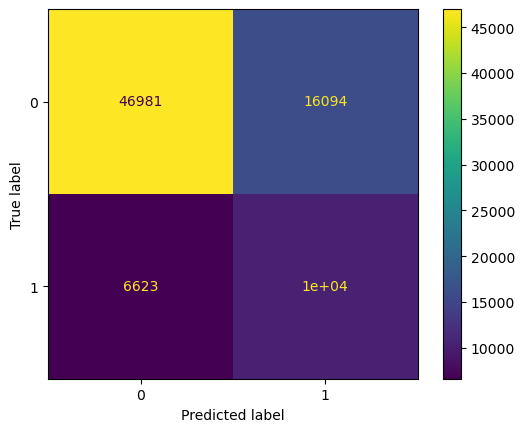

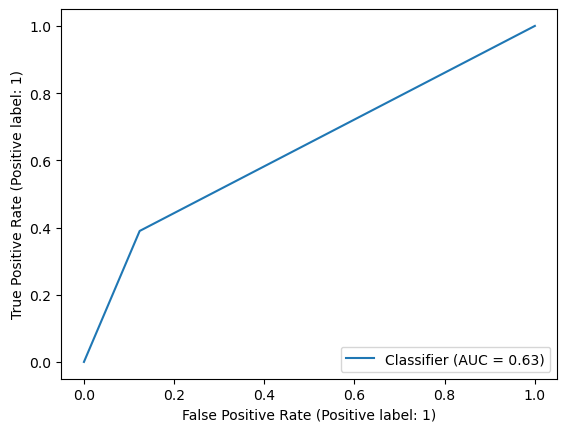

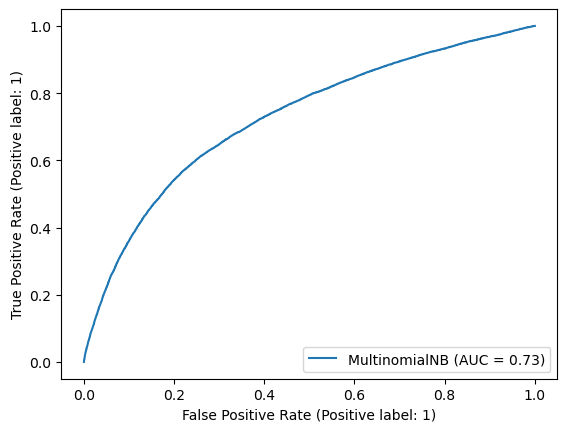

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)

n_features = 1400000
important_pos = np.union1d(mnb.feature_log_prob_[0].argsort()[-1 : -n_features - 1 : -1],
                                   mnb.feature_log_prob_[1].argsort()[-1 : -n_features - 1 : -1])
y_pred = mnb.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos])

print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_predictions(y_pred, y_test)
RocCurveDisplay.from_estimator(mnb, X_test[:, important_pos], y_test);

In [39]:
songs[songs['band_name'] == 'Judas Priest'].index

Int64Index([404906, 404907, 404908, 404909, 404910, 404911, 404912, 404913,
            404914, 404915,
            ...
            405198, 405199, 405200, 405201, 405202, 405203, 405204, 405205,
            405206, 405207],
           dtype='int64', length=302)

## Testing with few bands

I calculated the ratio of the songs that are classified as black metal by these 4 famous bands. While the result isn't good, this model might be good at classifying other songs.

In [57]:
bands.loc[[62325, 72890, 71964, 57759]]

name                                                url  \
62325   Judas Priest  https://www.metal-archives.com/bands/Judas_Pri...   
72890  Mercyful Fate  https://www.metal-archives.com/bands/Mercyful_...   
71964         Mayhem     https://www.metal-archives.com/bands/Mayhem/67   
57759       Immortal   https://www.metal-archives.com/bands/Immortal/75   

             genre                                              theme label  \
62325  Heavy Metal  ['Dark fantasy', ' History', ' Allegory', ' In...   NaN   
72890  Heavy Metal  ['Satanism (early)', ' Evil', ' Horror', ' Occ...   NaN   
71964  Black Metal  ['Satanism', ' Death', ' Gore (early); Misanth...   NaN   
57759  Black Metal  ['Grimness', ' Winter', ' War', ' Winterdemons...   NaN   

              country                                           location  \
62325  United Kingdom                 Birmingham, West Midlands, England   
72890         Denmark  Copenhagen, Hovedstaden (early); Denmark / Uni...   
71964          Norway                   Ski, Viken (early); Oslo (later)   
57759          Norway                                Os/Bergen, Vestland   

         status    date                                       years  
62325    Active  1970.0                 1969-1970 (as),1970-present  
72890    Active  1981.0  1981-1985,1993-1999,2008,2011,2019-present  
71964    Active  1984.0            1984 (as),1984-1993,1994-present  
57759  Disputed  1991.0               1991-2003,2006-2015,2015-2020

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

def predict_band(test_pos):
    train_pos = songs.index - test_pos
    
    genre_pos = 4
    X_train, y_train = balance(lyrics_mat[train_pos], genre_mat[train_pos, genre_pos].toarray().ravel())
    X_test, y_test = lyrics_mat[train_pos], genre_mat[test_pos, genre_pos].toarray().ravel()
    mnb = MultinomialNB()
    return mnb.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos]).sum() / X_test.shape[0]
    
print('Judas Priest', predict_band(pd.Index([62325])))
print('Mercyful Fate', predict_band(pd.Index([72890])))
print('Mayhem', predict_band(pd.Index([71964])))
print('Immortal', predict_band(pd.Index([57759])))

Judas Priest 0.2995396141861849
Mercyful Fate 0.2984242851641234
Mayhem 0.29771657639003507
Immortal 0.29690008552522995


## Performance evaluation by cross-validate ROC on entire dataset

Code from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

In [59]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=11)
X, y = balance(lyrics_mat, genre_mat[:, genre_pos].toarray().ravel())
X = X[:, important_pos]
classifier = mnb

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(20, 10))
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Cross-validate ROC",
)
ax.legend(loc="lower right")
plt.show()

# Neural network

In [ ]:
def activation(X,w,b):
    return (np.dot(X,w)+b)      

def loss(X,y, w, b):
    dif=y- activation(X, w,b)
    return np.sum(dif**2/(2*len(y)),keepdims=True)

def accuracy(X, y, w, b):
    pre = predict(X, w, b)
    return np.sum(np.where(pre==y,1,0))/len(y)    
 
def predict(X, w, b):
    result = np.int32(activation(X,w,b)+0.5)                         
    return result

def update(X, y, w, b, eta):  
    h =1e-4
    loss_origin = loss(X, y, w, b)                       # loss function
    delta_w=np.zeros_like(w) 
    delta_b=np.zeros_like(b) 
    
    for i in range(len(w)):
        tmp=w[i]
        w[i]+=h                                          
        loss_after=loss(X,y,w,b)                         
        delta_w[i] =eta*(loss_after - loss_origin)/h     
        w[i]=tmp 
        
    tmp=b 
    b += h                                                
    loss_after = loss(X, y, w, b)
    delta_b=eta*(loss_after-loss_origin)/h
    b=tmp
        
    w-=delta_w    
    b-=delta_b 
    
    #print('Delta:',delta_w,delta_b)
    return w,b

In [ ]:
for k in range(20): 
        weights, bias = update(x_train ,y_train, weights, bias,eta=0.01)

# Visualization of genre prediction

In [6]:
songs["pred"] = None
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

for genre_pos in np.asarray(top_genres).ravel():
    #  Set a column for the forecast
    sample = songs['lyrics'].sample(50000)

    vectorizer = TfidfVectorizer(smooth_idf=False)
    lyrics_mat = vectorizer.fit_transform(sample)

    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    # 
    y = mnb.predict(lyrics_mat)
    # Change 1 of the forecast to the corresponding number
    y[y == 1] = genre_pos
    songs["pred"][sample.index] = y
    y_pred = mnb.predict(X_test)
    print(f'{genre_pos: <10}{genre_names[genre_pos]: <15} \
            {mnb.score(X_test, y_test): <10}{matthews_corrcoef(y_test, y_pred)}')

10        death                       0.634     0.2092067632540683
50        thrash                      0.569     0.14401102651094472
4         black                       0.6868    0.2512658541988928
27        heavy                       0.5842    0.22111239884148715
38        power                       0.4282    0.15884086404109599
29        melodic                     0.366     0.10414585000612969
13        doom                        0.6022    0.11501259790813402
39        progressive                 0.4022    0.13223313843008397
23        grindcore                   0.9064    0.11715079589339197
46        speed                       0.522     0.08437487342370942
22        gothic                      0.4306    0.10468149771841329
24        groove                      0.5168    0.06231274799346988
6         brutal                      0.8856    0.17048885884827608
48        symphonic                   0.3442    0.06195164468194771
25        hard                        0.5622    0.

10        death           
50        thrash          
4         black           
27        heavy           
38        power           
29        melodic         
13        doom            
39        progressive     
23        grindcore       
46        speed           
22        gothic          
24        groove          
6         brutal          
48        symphonic       
25        hard            


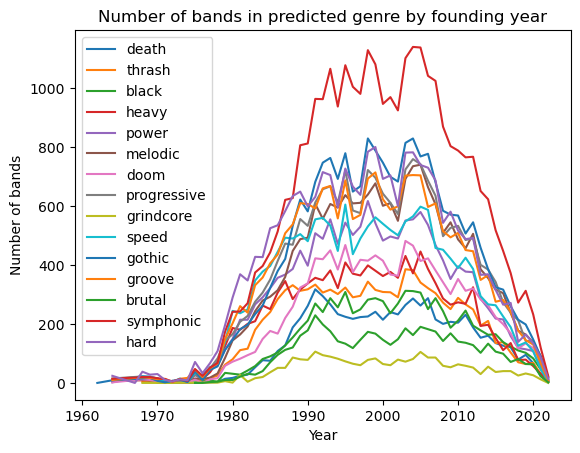

In [8]:
# Word frequency nephogram 
from matplotlib import pyplot as plt
from wordcloud import WordCloud

fig, ax = plt.subplots(1)
ax.set(title='Number of bands in predicted genre', xlabel='Founding year', ylabel='Number of bands')

for genre_pos in np.asarray(top_genres).ravel():
    print(f'{genre_pos: <10}{genre_names[genre_pos]: <15} ')
    df = songs[songs["pred"] == genre_pos]
    string=str(df[df["pred"] == genre_pos]["lyrics"])

    # The number of active bands in each major category in different years. 
    df["date"].value_counts().sort_index().plot(ax=ax, legend=True, label=genre_names[genre_pos])

10        death           


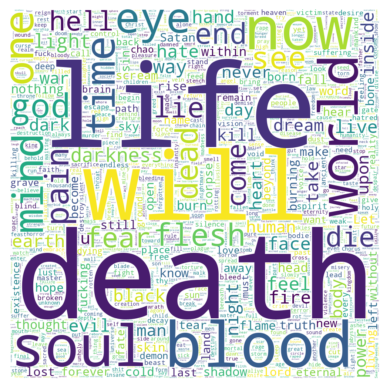

50        thrash          


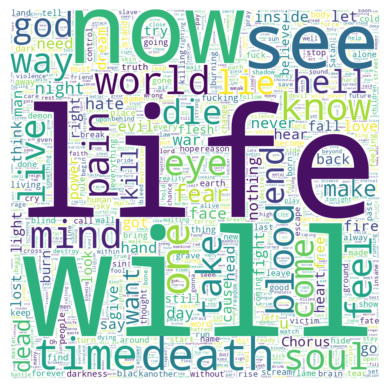

4         black           


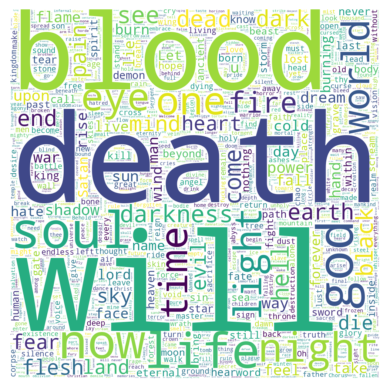

27        heavy           


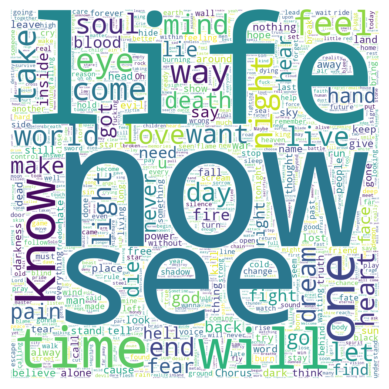

38        power           


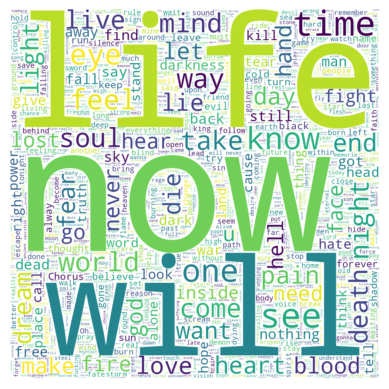

29        melodic         


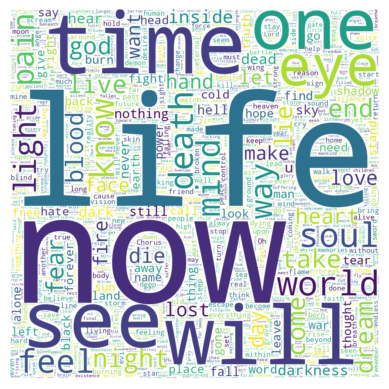

13        doom            


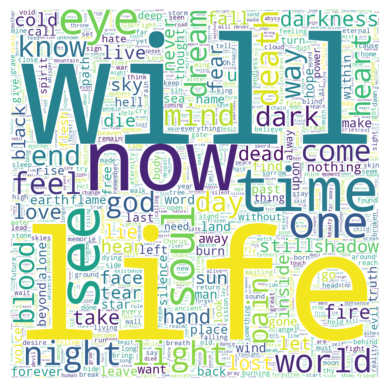

39        progressive     


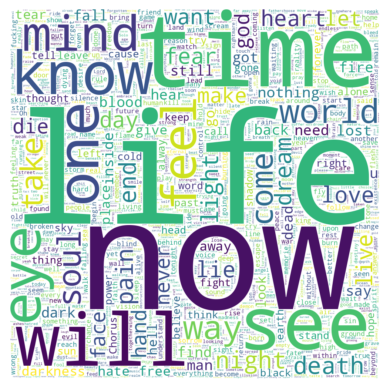

23        grindcore       


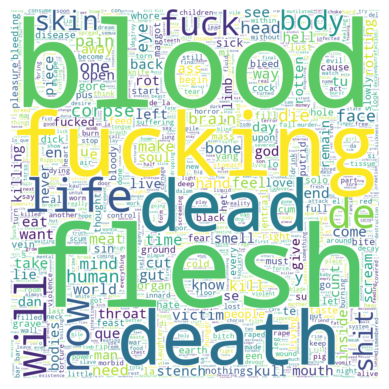

46        speed           


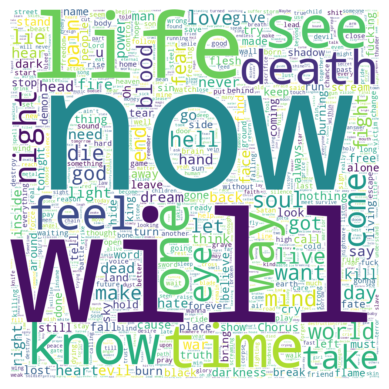

22        gothic          


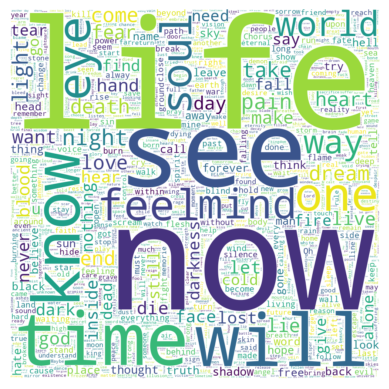

24        groove          


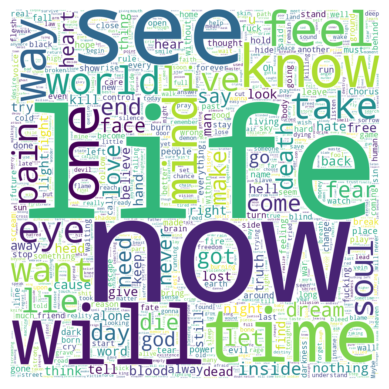

6         brutal          


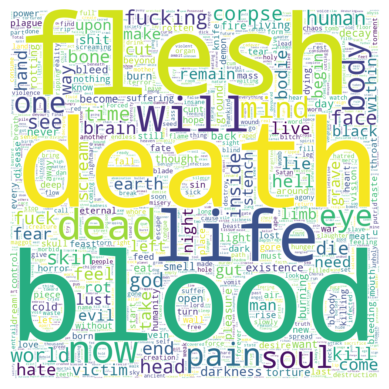

48        symphonic       


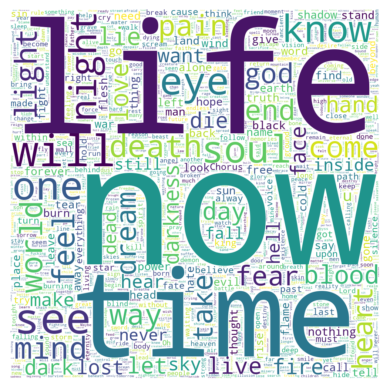

25        hard            


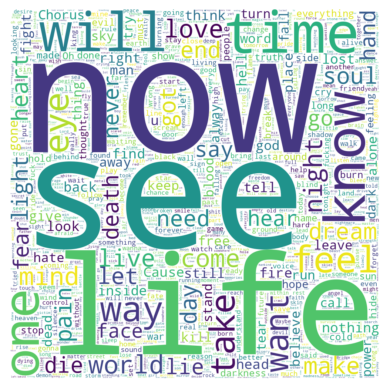

In [10]:
# Word frequency nephogram 
from matplotlib import pyplot as plt
from wordcloud import WordCloud

for genre_pos in np.asarray(top_genres).ravel():
    print(f'{genre_pos: <10}{genre_names[genre_pos]: <15} ')
    df = songs[songs["pred"] == genre_pos]
    string=df[df["pred"] == genre_pos]["lyrics"].sum()
    
    # Draw the word cloud picture of the movie nephogram
    #  Cloud picture of lyrics of each category 
    wordcloud = WordCloud(background_color='white',
                          max_words=10000, 
                          width=1000,
                          height=1000).generate(string)
    
    #  # Generate word cloud and show  
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Classification of genres within black metal

In [6]:
is_black = (genre_mat[:, 4] == 1).toarray().ravel()
genre_sum = genre_mat[is_black].sum(axis=0)
top_genres = np.argsort(genre_sum)[0, -1 : -12 : -1]
print(top_genres[0])
print(genre_names[top_genres])
print((genre_sum[0, top_genres] / songs.shape[0]))

[[ 4 10 50 29 48 13  2  1 22 42 12]]
[['black' 'death' 'thrash' 'melodic' 'symphonic' 'doom' 'atmospheric'
  'ambient' 'gothic' 'raw' 'depressive']]
[[0.21140862 0.04943333 0.0206836  0.01620853 0.01035055 0.00970911
  0.00725964 0.00686953 0.00627435 0.00521404 0.00462887]]


['00' '00 00' '00 01' ... 'zywot prowadze' 'zzavvryl' 'zzavvryl informed']
death          0.1455056845671387
thrash         0.19610863509081702
melodic        0.09339623603672034
symphonic      0.061106266341666424
doom           0.09228095530958447
atmospheric    0.14047362773102934
ambient        0.10624428537128443
gothic         0.08636359899591614
raw            0.0661630387985
depressive     0.10948454877731242


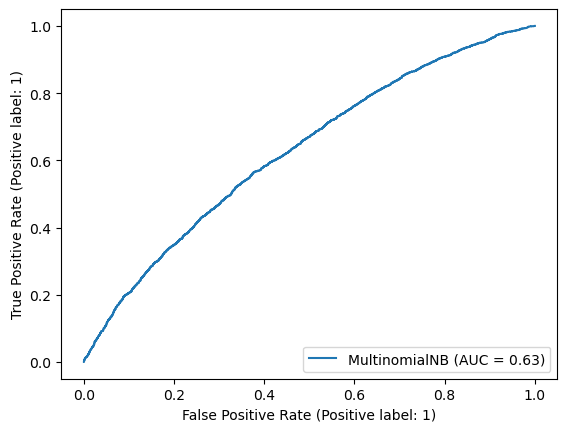

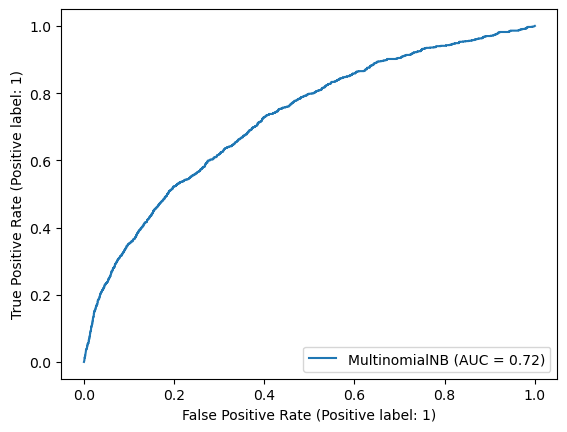

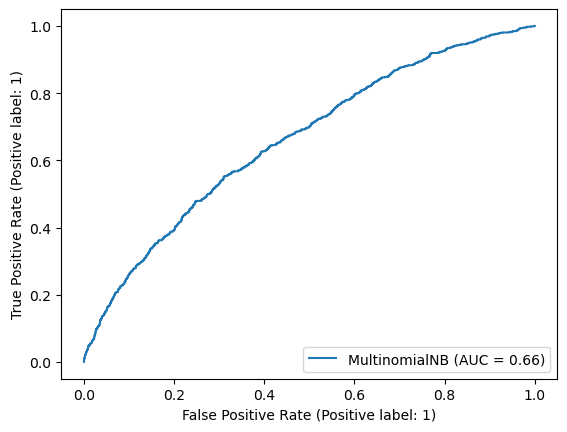

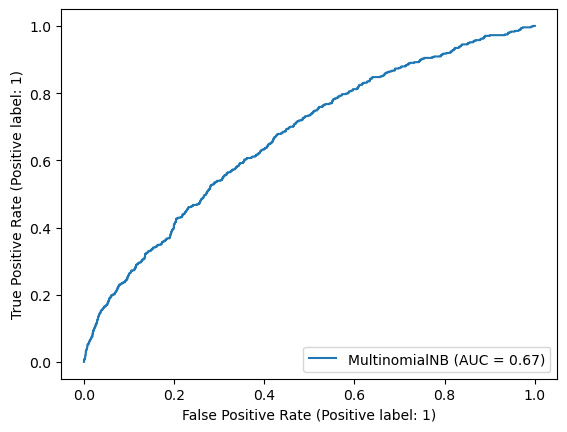

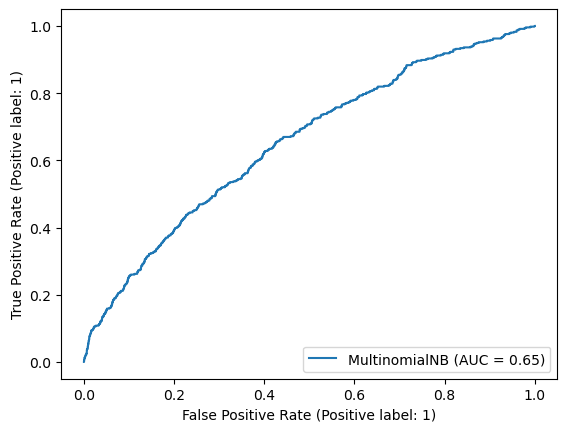

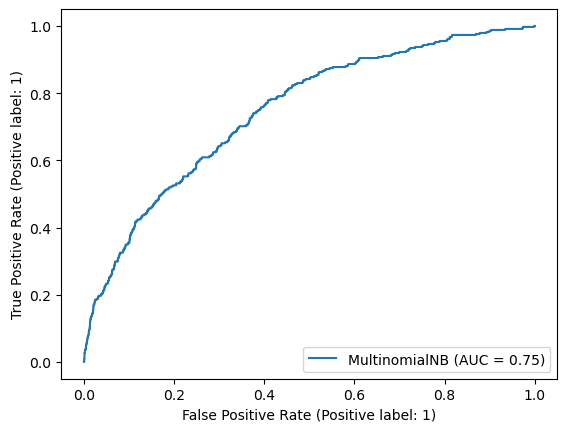

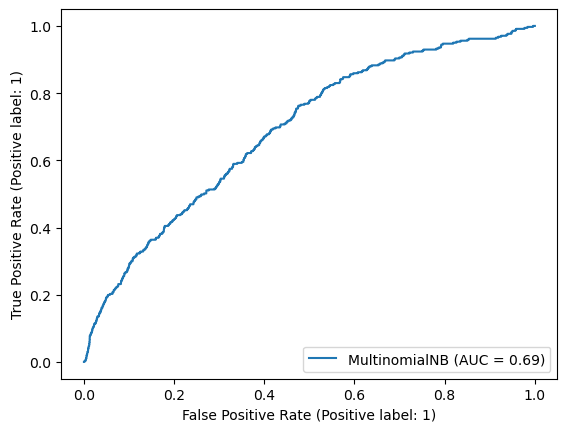

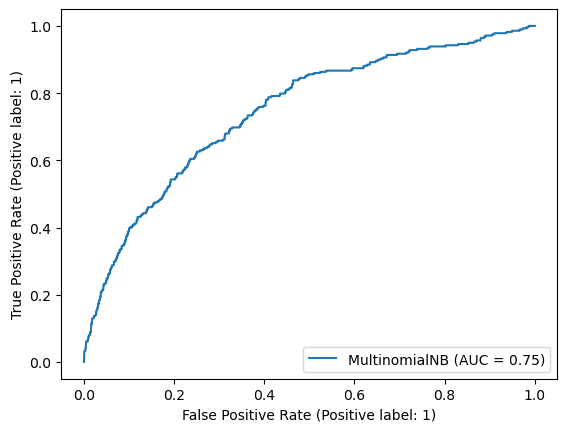

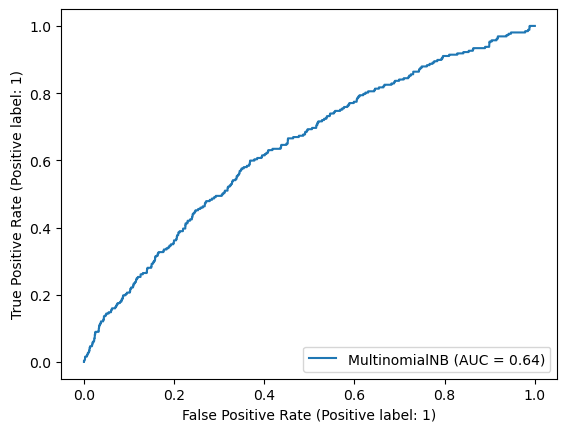

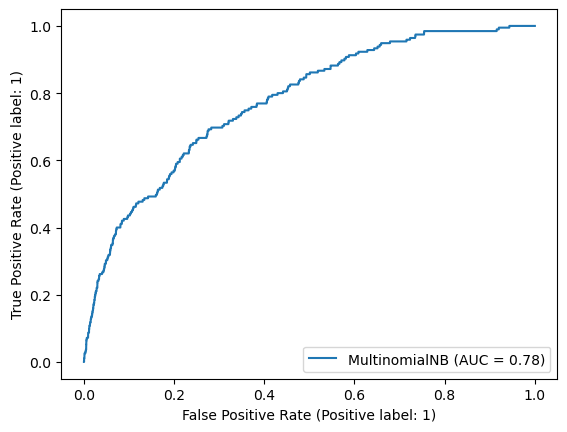

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

sample = songs['lyrics'][is_black].sample(100000, random_state=0)

vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=0.6)
lyrics_mat = vectorizer.fit_transform(sample)
lyrics_words = vectorizer.get_feature_names_out()
print(lyrics_words)

for genre_pos in np.asarray(top_genres).ravel():
    if genre_pos == 4: continue
    
    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

    mnb = MultinomialNB()
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    print(f'{np.asarray(genre_names).ravel()[genre_pos]:<15}{matthews_corrcoef(y_test, y_pred)}')
    
    RocCurveDisplay.from_estimator(mnb, X_test, y_test)